In [1]:
# train 파일 불러오기
train = pd.read_csv("./raw/train.csv")

In [2]:
# key 파일 불러오기
key = pd.read_csv("./raw/key.csv")

In [3]:
# key 파일 store_nbr로 정렬
key = key.sort_values("store_nbr").set_index(np.arange(len(key)))

In [4]:
# train, key 파일 merge
target = train.merge(key, how="left", on = "store_nbr")

In [5]:
target.to_csv("target.csv", sep=",", index=False)

---

In [ ]:
target = pd.read_csv("target.csv")

In [6]:
# units이 하나도 없는 item 찾기 - 없음
item_count = target.groupby("item_nbr")["units"].sum()
item_count[item_count.values == 0]

Series([], Name: units, dtype: int64)

In [28]:
item_count

item_nbr
1         778
2        3269
3         675
4         348
5      846662
6       41398
7         721
8       30345
9      916615
10        745
11        655
12        541
13        604
14        288
15       5334
16     226772
17        727
18        535
19        540
20        863
21       1699
22        162
23      34389
24       2421
25     148253
26       3429
27      11072
28       4893
29        831
30       1011
        ...  
82        443
83       8422
84        235
85        248
86        877
87        996
88        223
89        157
90       1083
91        600
92        724
93      27910
94        775
95      16594
96        469
97       1844
98       1281
99        492
100       552
101       450
102        31
103       241
104       656
105       637
106       139
107       534
108      2045
109      4208
110      1402
111       254
Name: units, Length: 111, dtype: int64

In [29]:
# units이 하나도 없는 store 찾기 - 없음
store_count = target.groupby("store_nbr")["units"].sum()
store_count

store_nbr
1      37629
2     173643
3     124962
4     131278
5      36454
6     105849
7     104395
8      45427
9     117079
10     78959
11     72260
12     50448
13    143602
14     28590
15    160554
16    165851
17    271413
18     29158
19     29037
20     99025
21    114644
22     80305
23     64725
24     90170
25    185025
26     90984
27     64441
28     79746
29    110296
30    172604
31    136907
32     92545
33    292616
34    141546
35     38275
36    101766
37    103099
38    148750
39     14931
40    113542
41     67756
42     92556
43     54388
44     79515
45     20252
Name: units, dtype: int64

In [30]:
# units이 하나도 없는 station 찾기 - 없음
station_count = target.groupby("station_nbr")["units"].sum()
station_count

station_nbr
1      37629
2     165851
3     517556
4      45427
5      38275
6     247997
7     303733
8      14931
9     221448
10    217006
11    104836
12    262684
13    654765
14    520798
15     29037
16     48842
17    580399
18    101766
19    172604
20    271413
Name: units, dtype: int64

In [51]:
# unit의 종류
a = np.sort(target["units"].unique())
b = np.bincount(target["units"])

a

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  117,  118,  119,  120,
        121,  122,  123,  124,  125,  126,  127,  128,  129,  130,  131,
        132,  133,  134,  135,  136,  137,  138,  139,  140,  141,  142,
        143,  144,  145,  146,  147,  148,  149,  1

In [46]:
# black friday
black_fridays = ['2012-11-20', '2012-11-21', '2012-11-22', '2012-11-23', '2012-11-24', '2012-11-25', '2012-11-26', '2013-11-26',
                '2013-11-27', '2013-11-28', '2013-11-29', '2013-11-30', '2013-12-01', '2013-12-02']
target["black_fridays"] = 

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [95]:
target[(target["units"] == 5568) | (target["units"] == 3369) | (target["units"] == 577) | (target["units"] == 503)]

,date,store_nbr,item_nbr,units,station_nbr
1488312,2012-10-28,16,25,577,2
1580533,2012-11-15,37,5,5568,13
3190033,2013-11-21,37,5,3369,13
3260078,2013-12-08,17,9,503,20


In [30]:
# 그래프를 잘 보기 위해 unit이 이상하게 높은 3369, 5568 제거
target_rm = target[target["units"] < 3000]
len(target_rm)

4617598

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


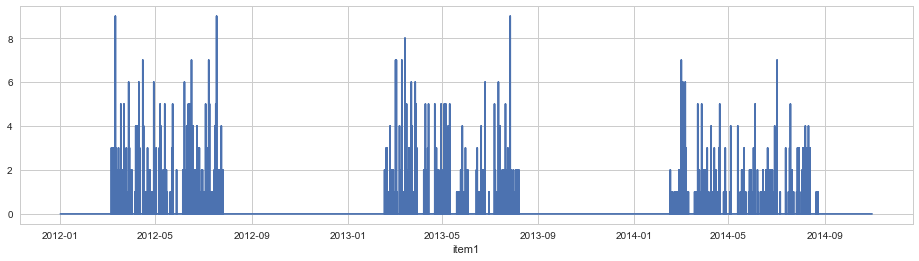

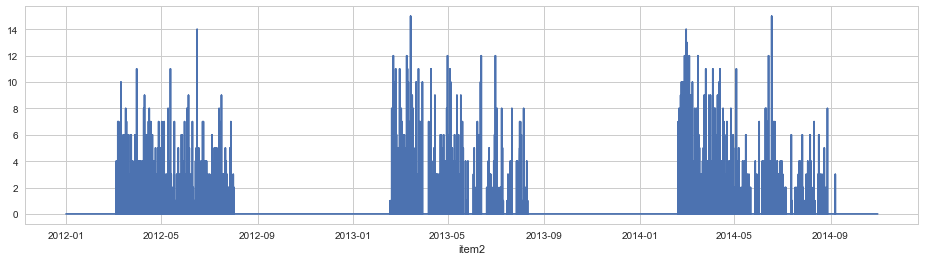

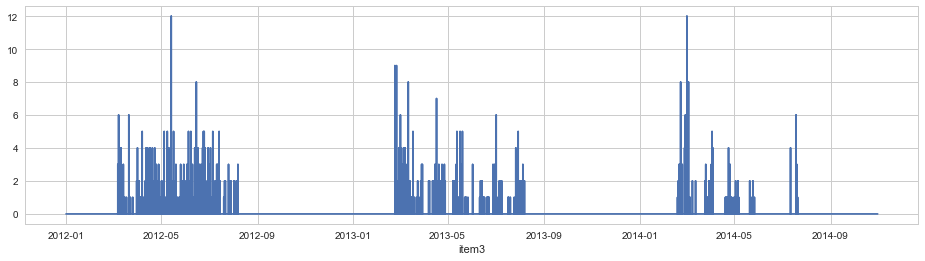

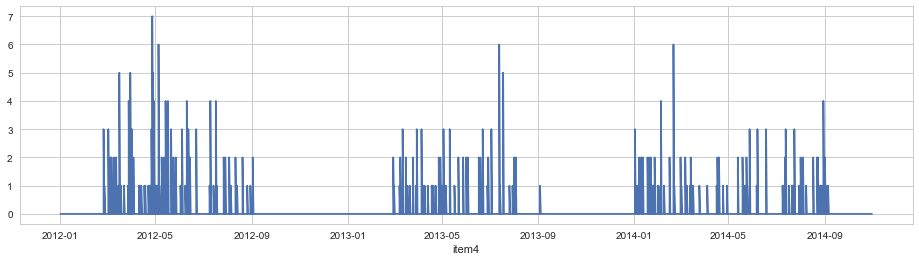

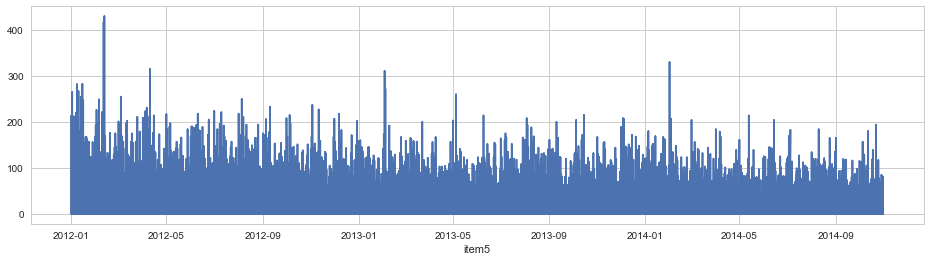

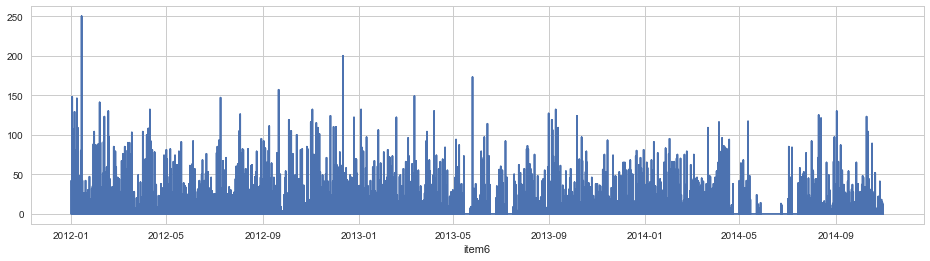

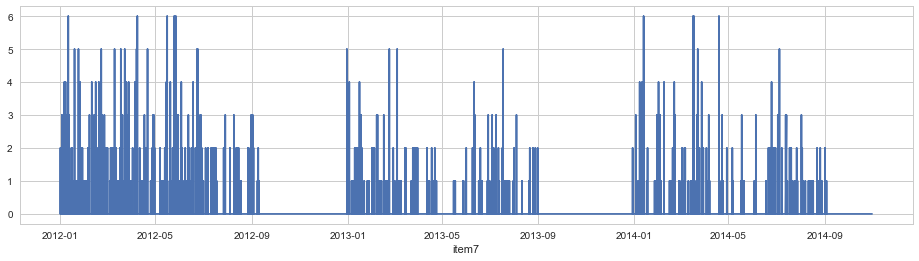

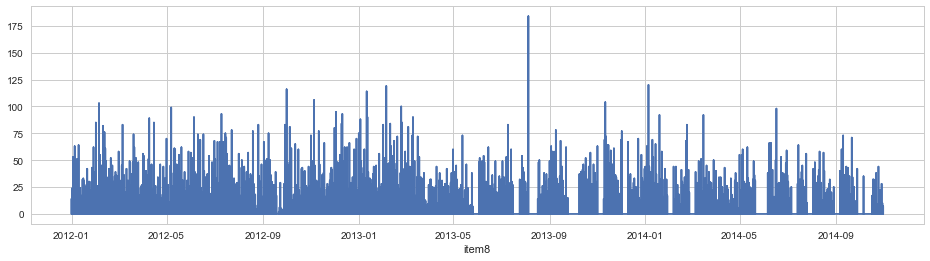

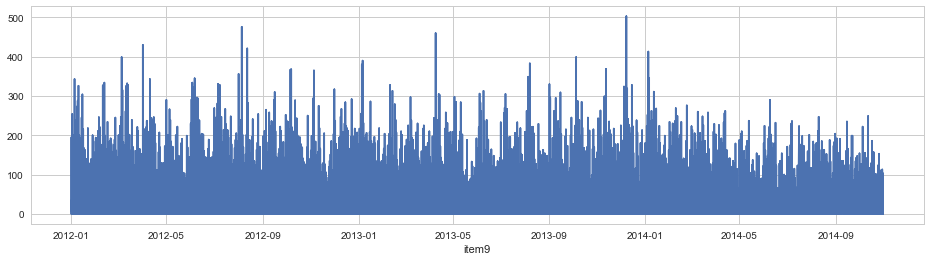

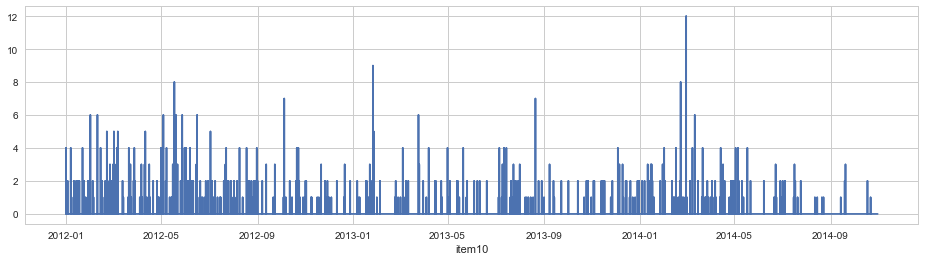

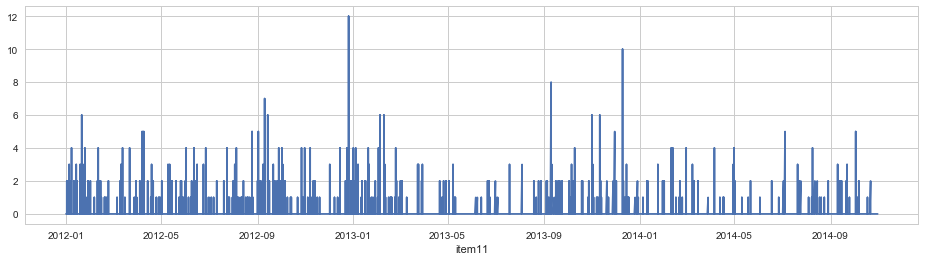

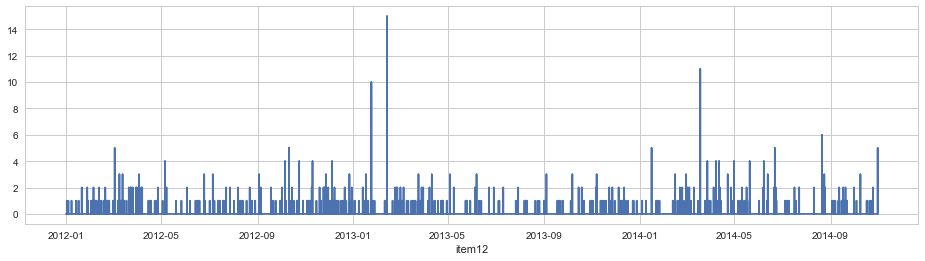

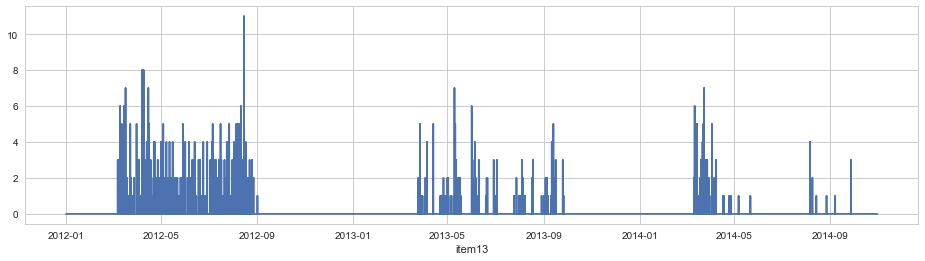

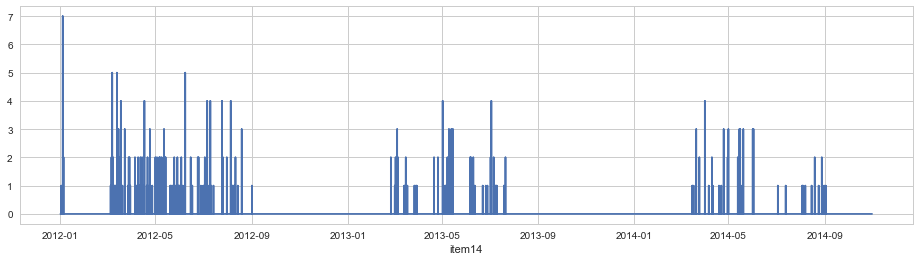

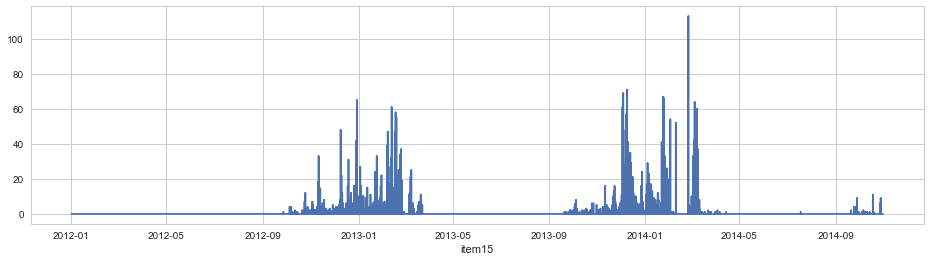

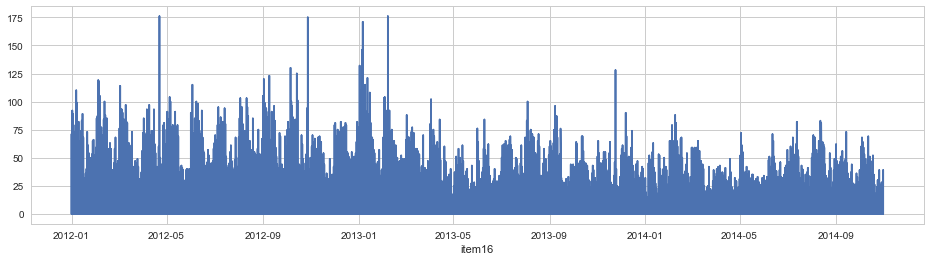

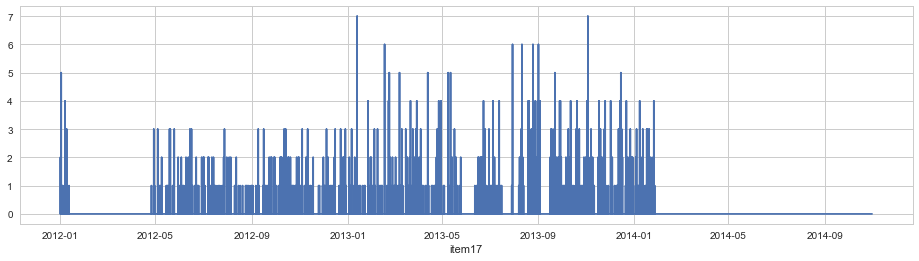

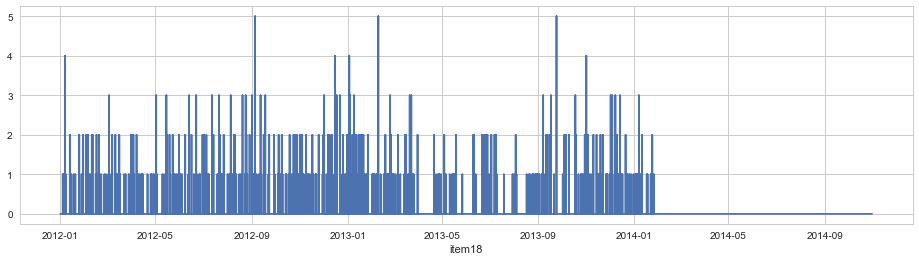

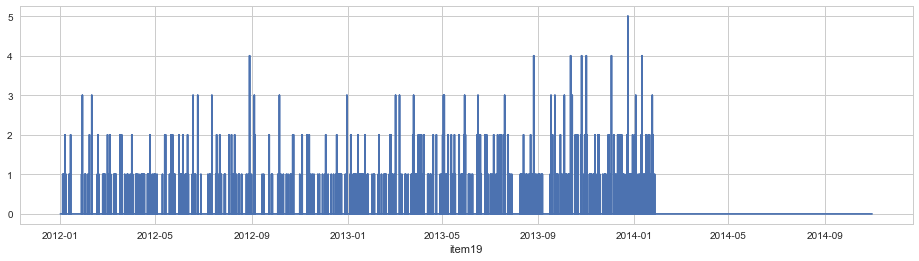

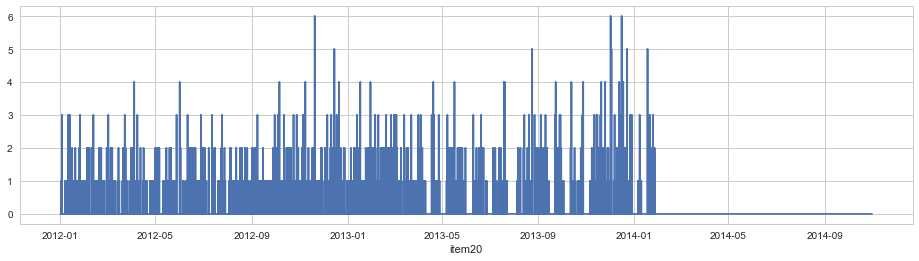

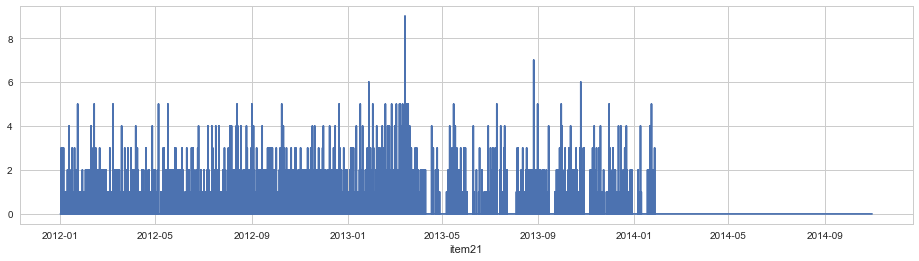

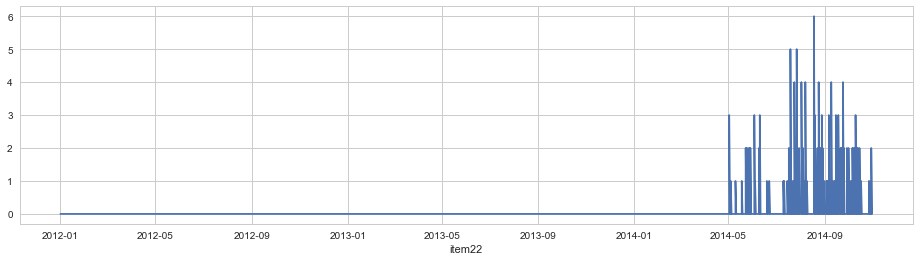

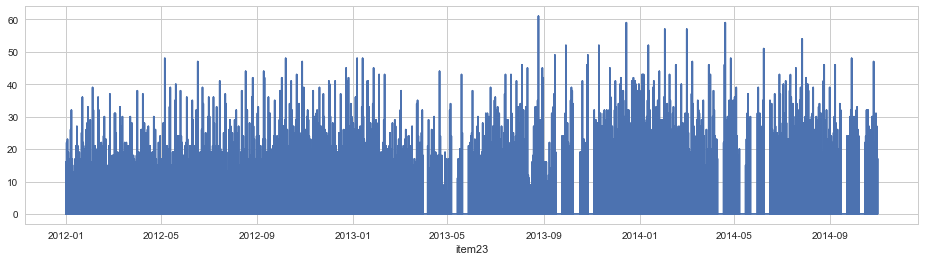

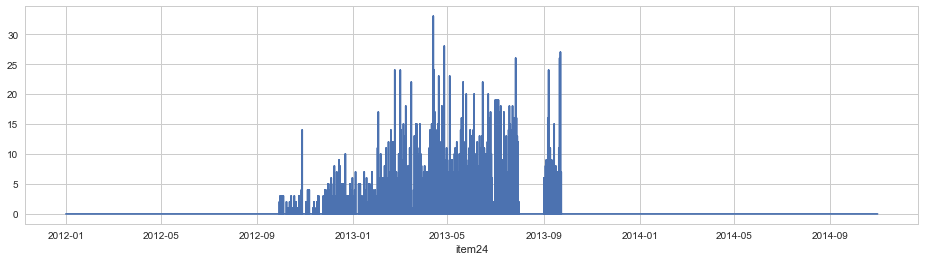

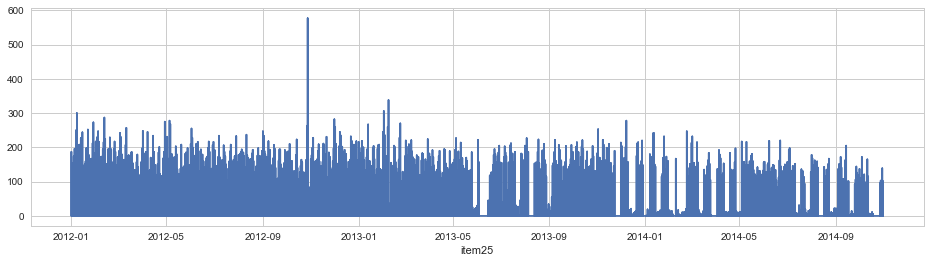

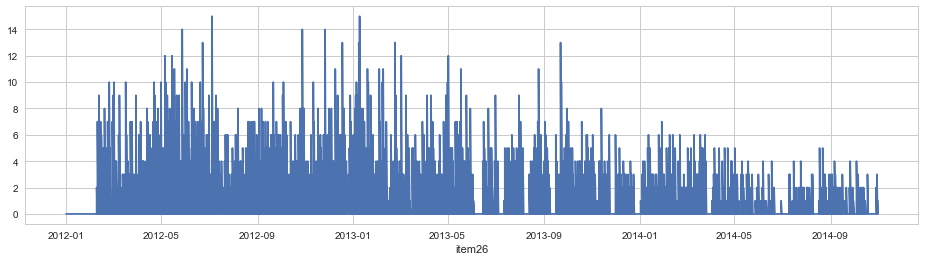

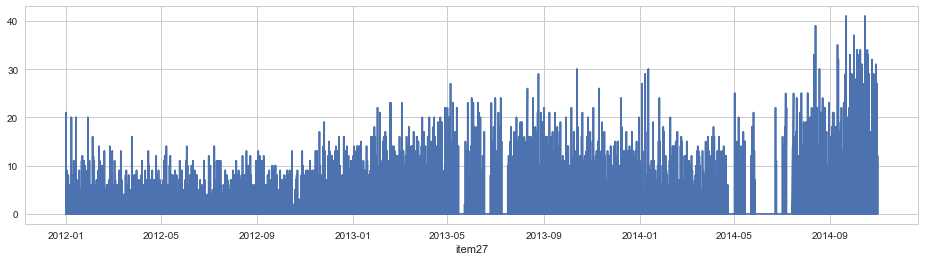

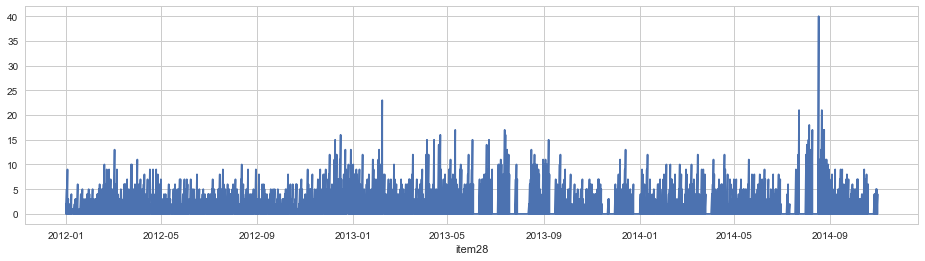

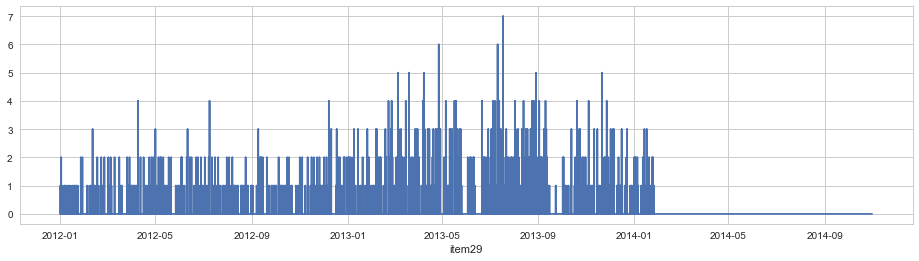

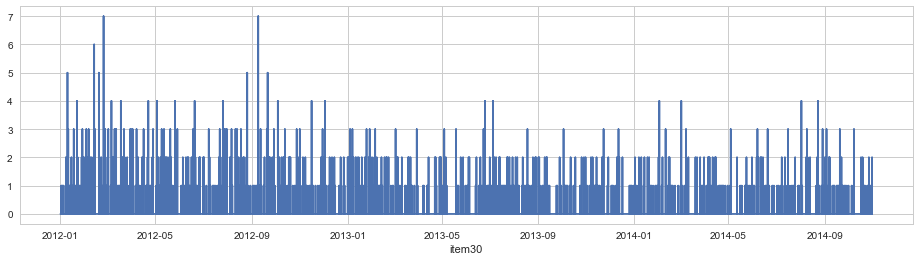

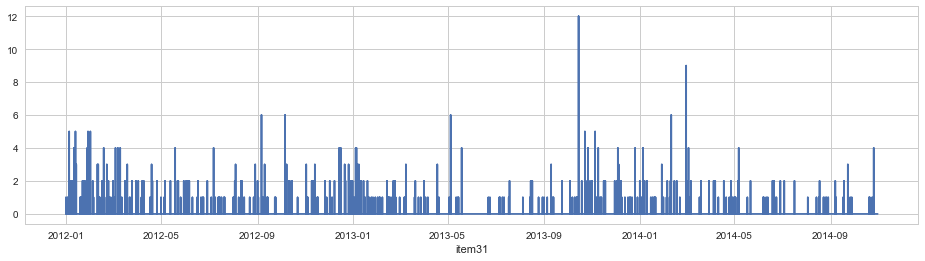

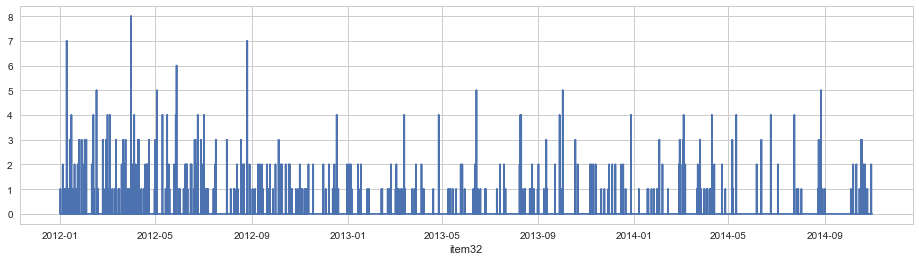

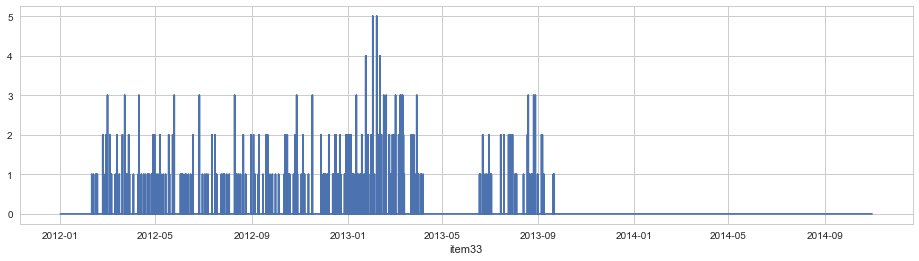

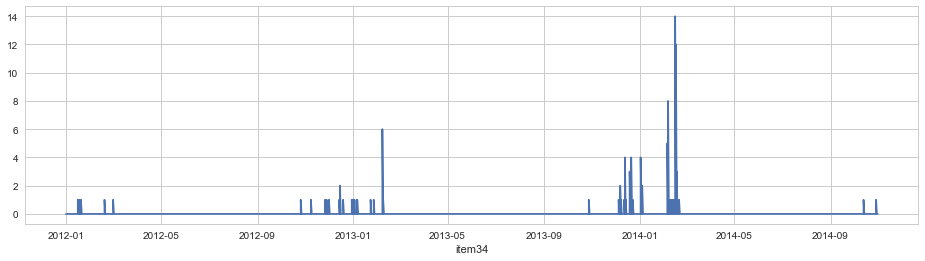

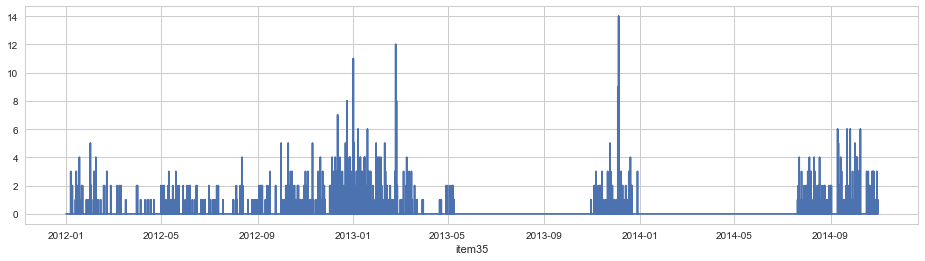

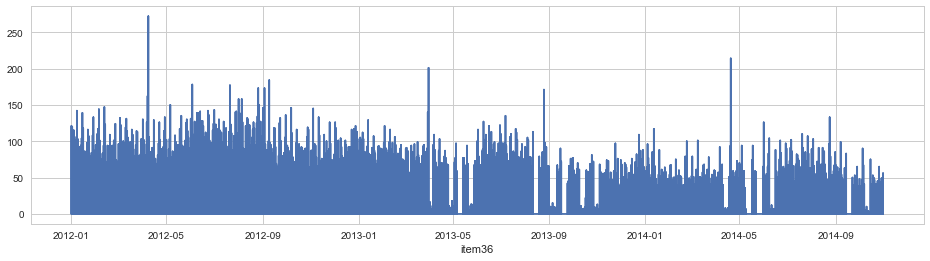

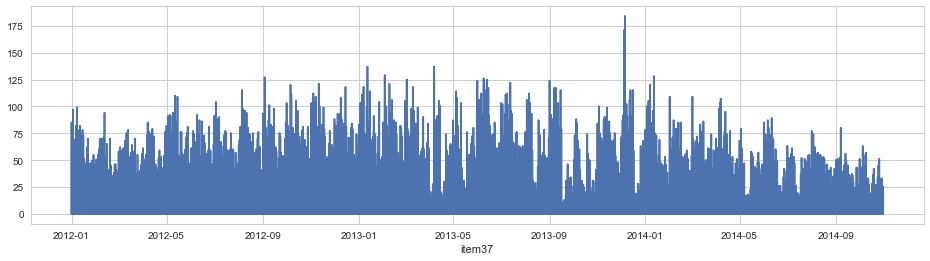

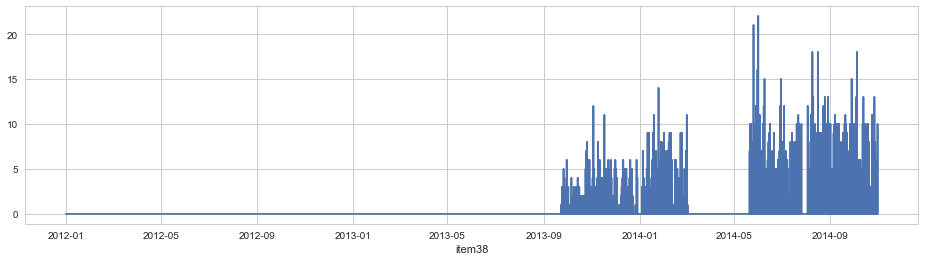

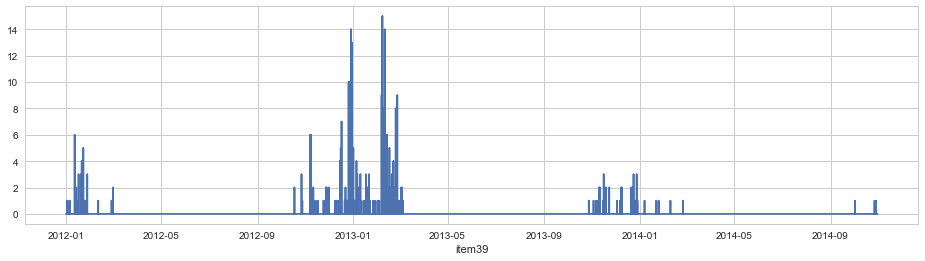

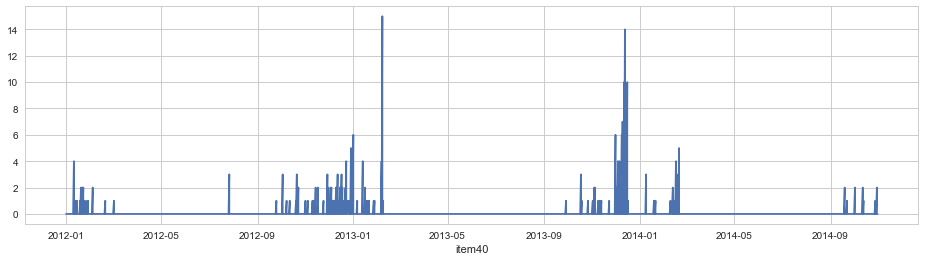

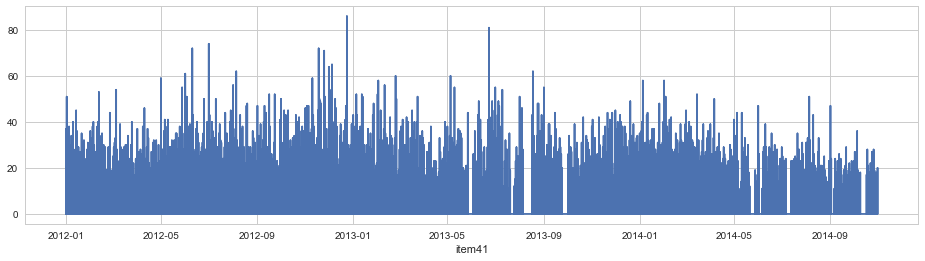

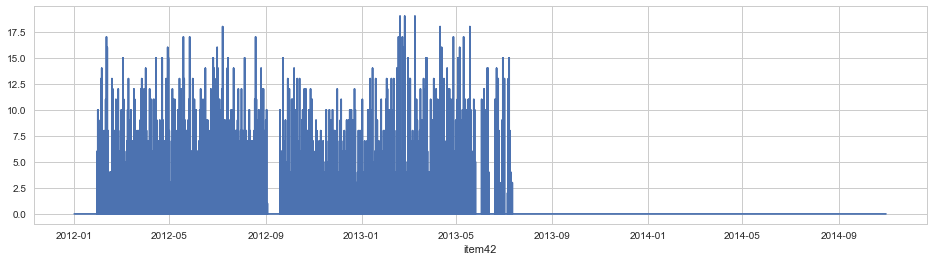

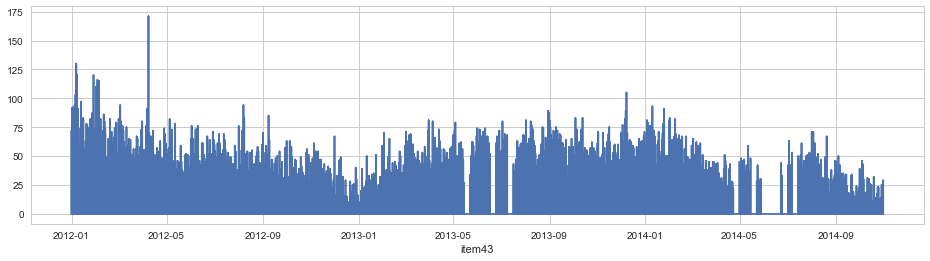

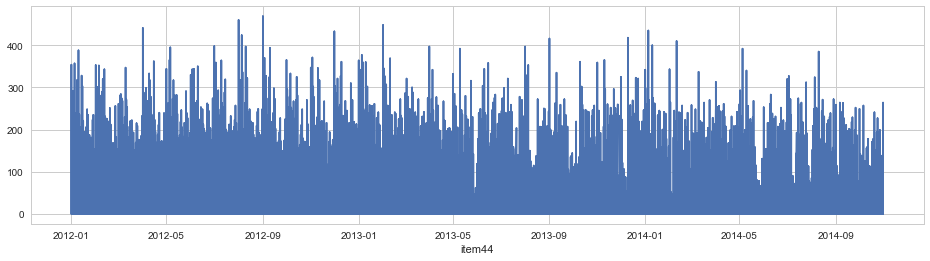

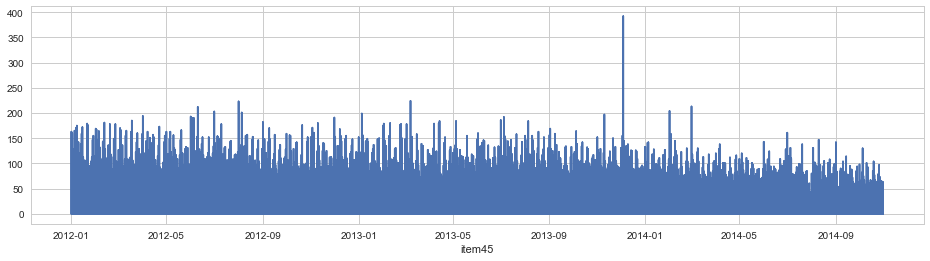

In [35]:
# item 별로 그래프 그리기
def make_item_graph():
    for i in range(1, 46):
        item = target_rm[target_rm["item_nbr"] == i]
        plt.figure(figsize=(16, 4))
        plt.xlabel("item"+str(i))
        plt.plot(pd.to_datetime(item["date"]), item["units"])
        plt.plto(pd)
make_item_graph()

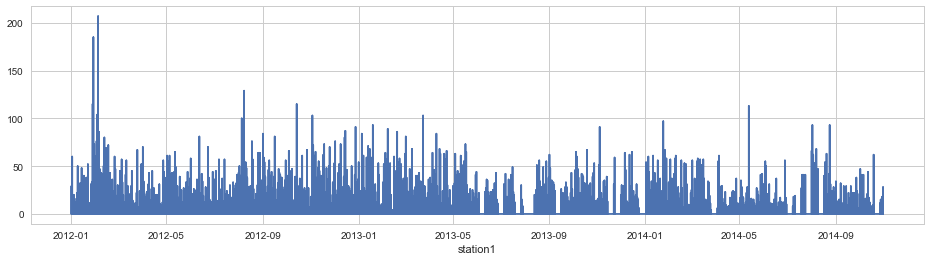

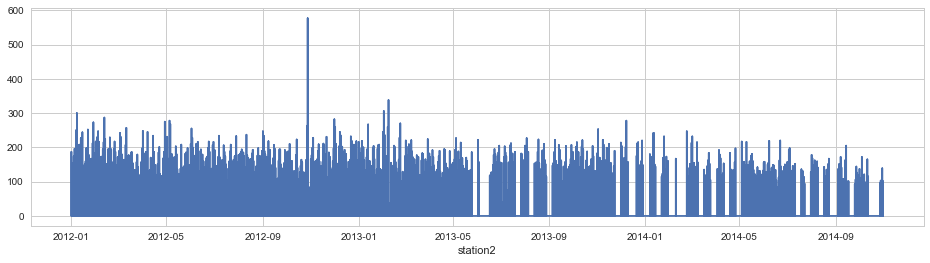

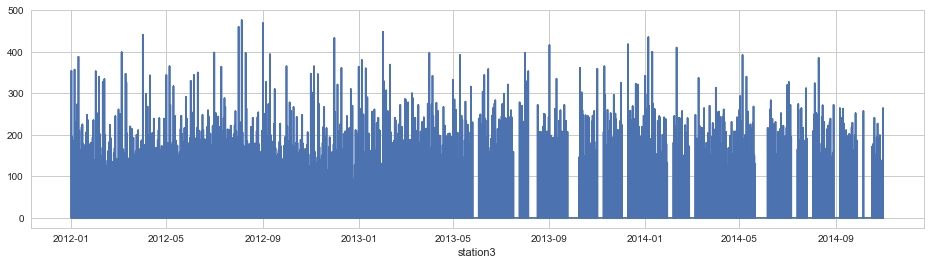

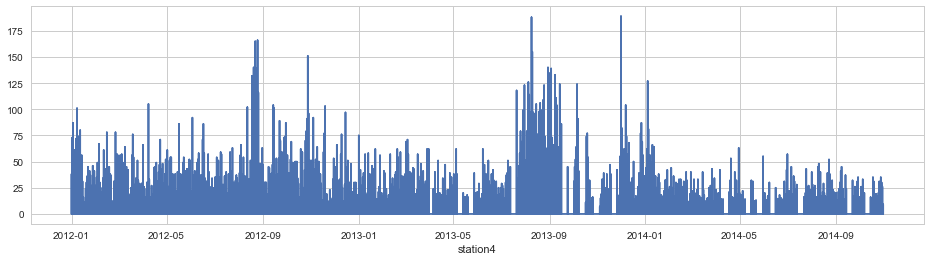

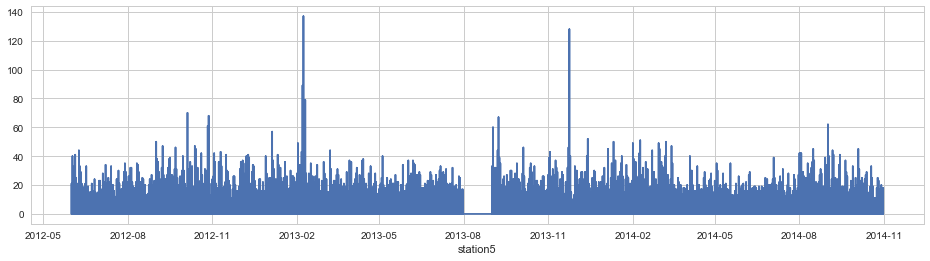

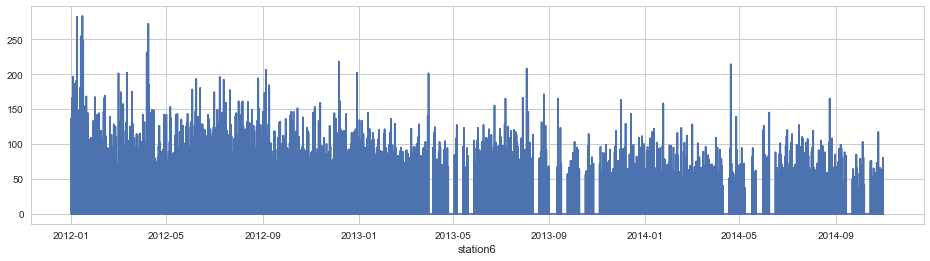

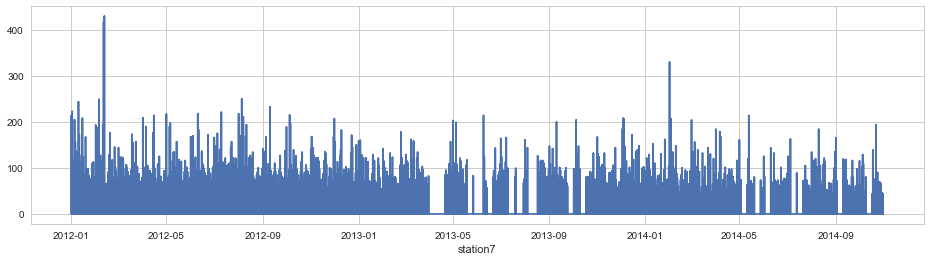

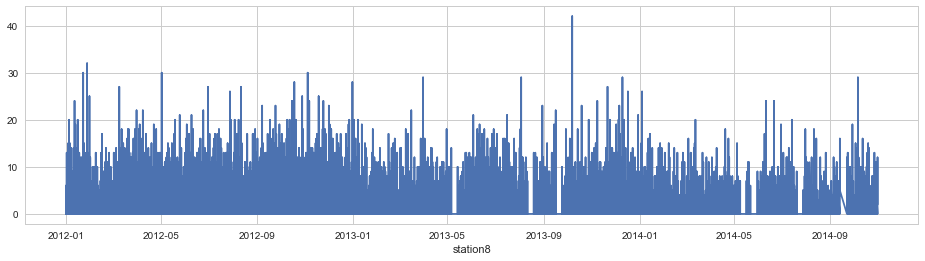

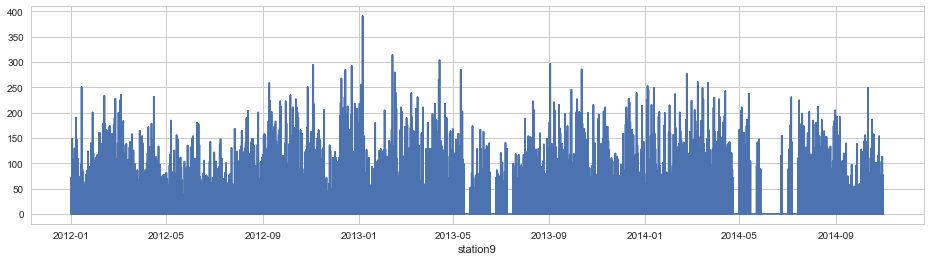

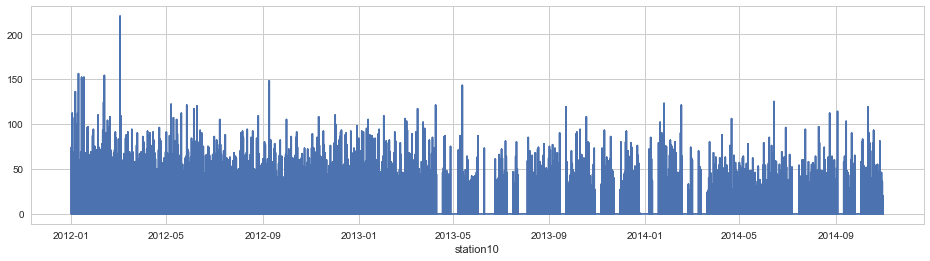

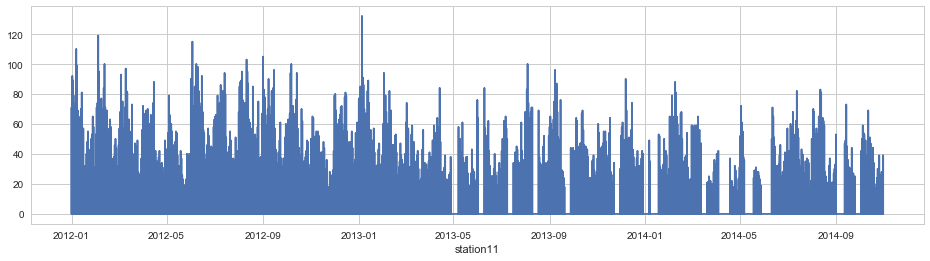

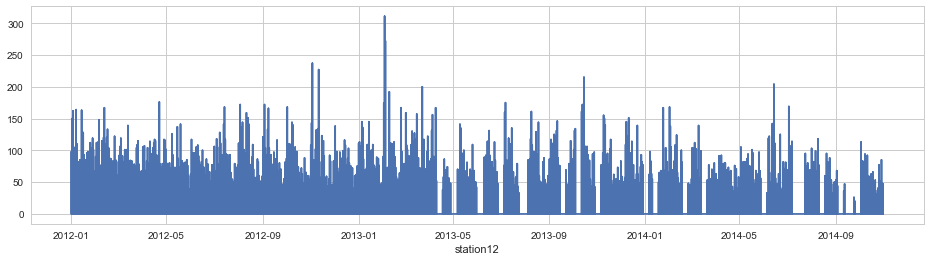

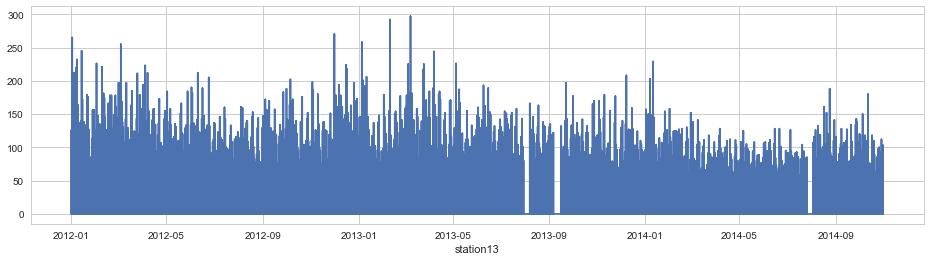

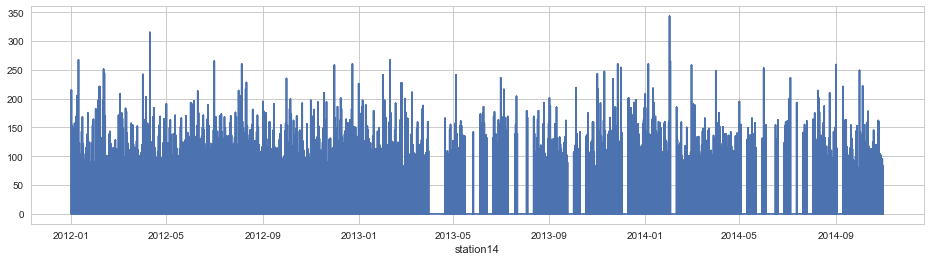

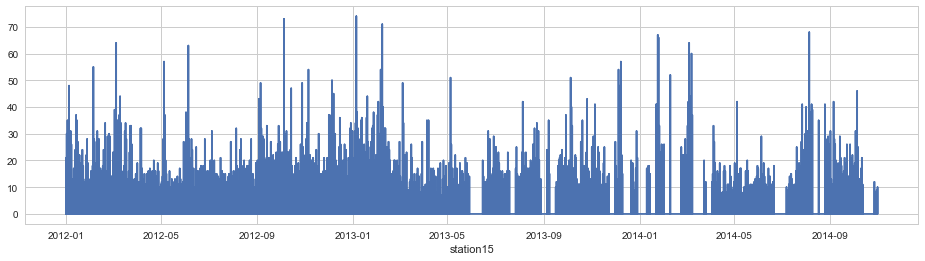

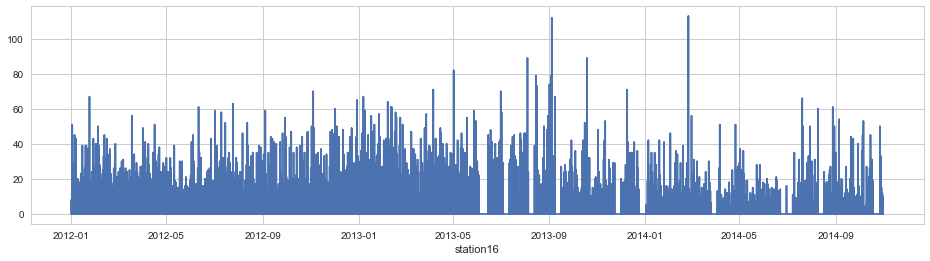

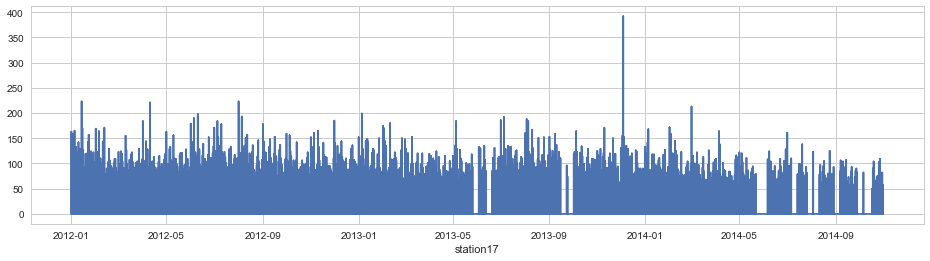

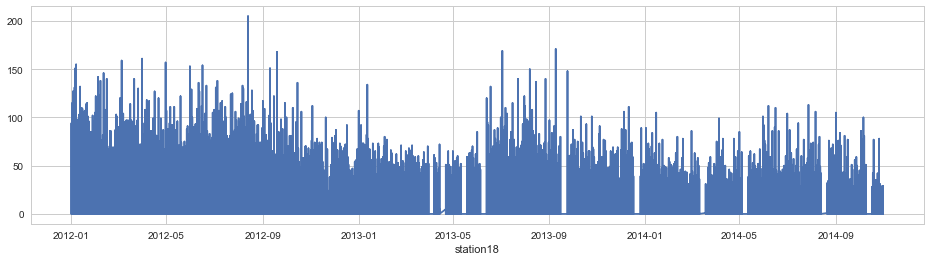

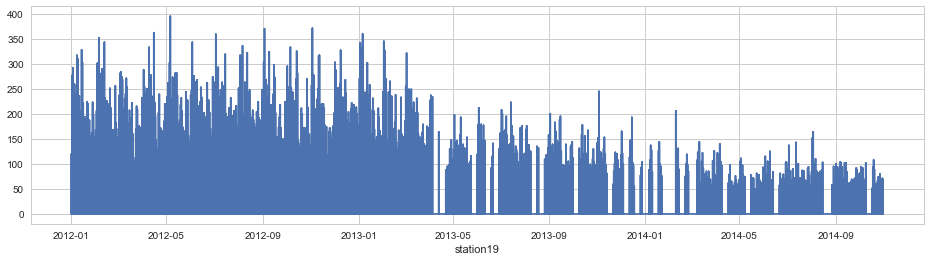

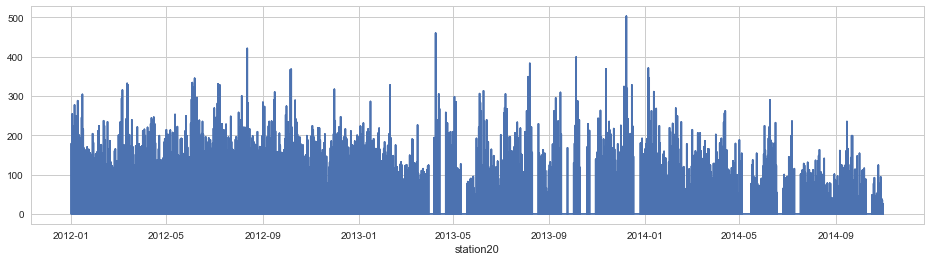

In [36]:
# 20개 station에 대해서 item 별로 그래프 그리기
def make_station_graph():
    for i in range(1, 21):
        station = target_rm[target_rm["station_nbr"] == i]
        plt.figure(figsize=(16, 4))
        plt.xlabel("station"+str(i))
        plt.plot(pd.to_datetime(station["date"]), station["units"])
        
make_station_graph()

In [35]:
target.pivot_table(columns="store_nbr", index="item_nbr", values = "units", aggfunc=sum, margins=True, margins_name="All")

store_nbr,1,2,3,4,5,6,7,8,9,10,...,37,38,39,40,41,42,43,44,45,All
item_nbr,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,778
2,0,0,1083,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3269
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,675,0,0,675
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,348,348
5,0,55104,56663,0,0,0,62230,32647,45024,61866,...,50063,0,0,48454,0,35178,0,32834,0,846662
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,41398
7,0,0,0,0,0,0,721,0,0,0,...,0,0,0,0,0,0,0,0,0,721
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30345
9,27396,0,0,117123,0,50431,0,0,0,0,...,0,66679,5057,0,0,0,0,0,15833,916615


In [36]:
target.pivot_table(values="units", columns="station_nbr", index="item_nbr", aggfunc=sum, margins=True, margins_name="All")

station_nbr,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,All
item_nbr,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,778,0,0,778
2,0,0,0,0,0,0,1787,0,0,0,...,0,0,0,0,0,1482,0,0,0,3269
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,675
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,348,0,0,0,0,348
5,0,0,41641,32647,0,129471,161035,0,0,0,...,94700,163039,90282,0,0,133847,0,0,0,846662
6,0,0,0,0,0,0,0,0,41398,0,...,0,0,0,0,0,0,0,0,0,41398
7,0,0,0,0,0,721,0,0,0,0,...,0,0,0,0,0,0,0,0,0,721
8,0,0,30345,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,30345
9,27396,0,101586,0,0,0,0,5057,117123,108635,...,0,140448,117110,0,27997,100022,35874,0,135367,916615
